In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
football_df = pd.read_csv('Fifa 23 Players Data.csv')
football_df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [72]:
football_df.shape

(18539, 89)

In [73]:
football_df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [74]:
football_df['Club Name']

0        Paris Saint-Germain
1             Real Madrid CF
2               FC Barcelona
3            Manchester City
4        Paris Saint-Germain
                ...         
18534           Sligo Rovers
18535           Guangzhou FC
18536             Derry City
18537             Derry City
18538    NorthEast United FC
Name: Club Name, Length: 18539, dtype: object

In [75]:
bayern_players = football_df[football_df['Club Name'] == 'FC Bayern München']
bayern_players

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
15,S. Mané,Sadio Mané,89,89,99500000,"LM,CF",LM,Senegal,https://cdn.sofifa.net/players/208/722/23_60.png,30,...,89,82,89,71,68,71,68,62,68,22
17,J. Kimmich,Joshua Kimmich,89,90,105500000,"CDM,RB",CDM,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,...,86,89,86,87,89,87,86,84,86,24
34,T. Müller,Thomas Müller,87,87,63000000,"CAM,CF",CAM,Germany,https://cdn.sofifa.net/players/189/596/23_60.png,32,...,86,85,86,74,74,74,72,66,72,23
41,L. Goretzka,Leon Goretzka,87,88,91000000,"CM,CDM",CM,Germany,https://cdn.sofifa.net/players/209/658/23_60.png,27,...,86,88,86,85,87,85,85,86,85,22
56,K. Coman,Kingsley Coman,86,87,80000000,LM,LM,France,https://cdn.sofifa.net/players/213/345/23_60.png,26,...,87,78,87,63,58,63,59,48,59,16
67,S. Gnabry,Serge Gnabry,85,85,59000000,RM,RM,Germany,https://cdn.sofifa.net/players/206/113/23_60.png,26,...,85,80,85,69,66,69,65,56,65,21
84,M. de Ligt,Matthijs de Ligt,85,89,71000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/235/243/23_60.png,22,...,68,71,68,79,81,79,81,87,81,22
91,L. Hernández,Lucas Hernández,84,86,46000000,"CB,LB",CB,France,https://cdn.sofifa.net/players/220/814/23_60.png,26,...,74,74,74,83,82,83,84,86,84,21
135,L. Sané,Leroy Sané,84,85,49500000,LM,LM,Germany,https://cdn.sofifa.net/players/222/492/23_60.png,26,...,85,78,85,67,63,67,63,55,63,21


In [76]:
bayern_players = football_df[football_df['Club Name'] == 'FC Bayern München']

top_bayern_players = bayern_players.sort_values(by='Overall', ascending=False)

top_5_bayern_players = top_bayern_players.head(5)

print(top_5_bayern_players[['Known As', 'Full Name', 'Overall']])

       Known As       Full Name  Overall
7      M. Neuer    Manuel Neuer       90
15      S. Mané      Sadio Mané       89
17   J. Kimmich  Joshua Kimmich       89
34    T. Müller   Thomas Müller       87
41  L. Goretzka   Leon Goretzka       87


In [77]:
top_players = football_df.sort_values(by='Overall', ascending=False)

top_5_players = top_players.head(5)

print(top_5_players[['Known As', 'Full Name', 'Overall']])

         Known As           Full Name  Overall
0        L. Messi        Lionel Messi       91
2  R. Lewandowski  Robert Lewandowski       91
3    K. De Bruyne     Kevin De Bruyne       91
4       K. Mbappé       Kylian Mbappé       91
1      K. Benzema       Karim Benzema       91


In [78]:
# Average value of players in the dataset
average_value = football_df['Value(in Euro)'].mean()
average_value

2875461.4033658775

In [79]:
# Average value of Bayern players
bayern_players = football_df[football_df['Club Name'] == 'FC Bayern München']

average_value_bayern = bayern_players['Value(in Euro)'].mean()
average_value_bayern

43744318.18181818

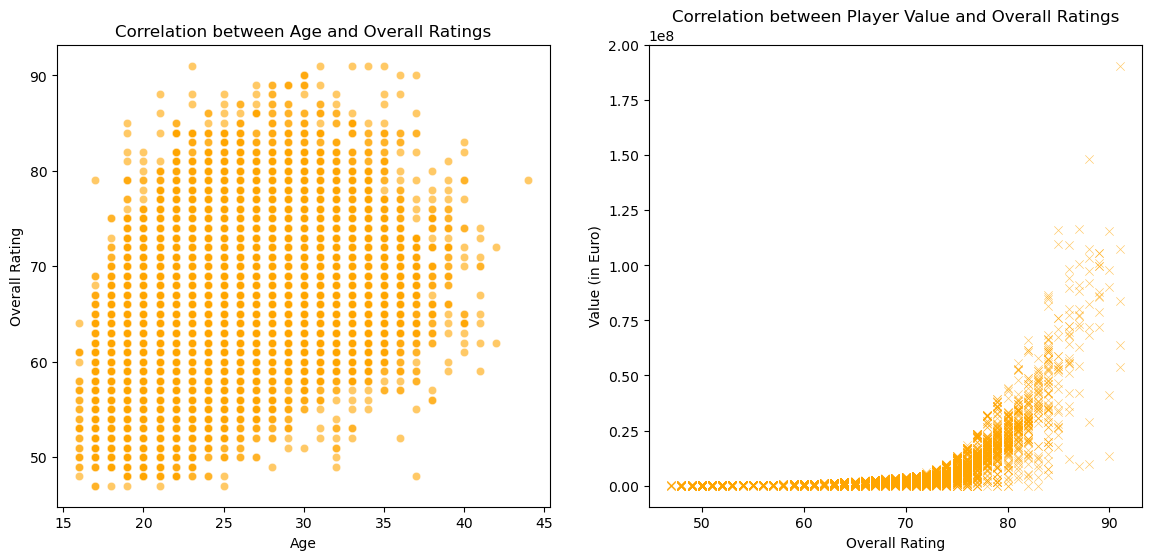

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Correlation between Age and Overall Ratings
sns.scatterplot(ax=axes[0], x=football_df['Age'], y=football_df['Overall'], alpha=0.6, color='orange')
axes[0].set_title('Correlation between Age and Overall Ratings')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Overall Rating')

# Correlation between Player Value and Overall Ratings
sns.scatterplot(ax=axes[1], x=football_df['Overall'], y=football_df['Value(in Euro)'], alpha=0.6, color='orange', marker='x')
axes[1].set_title('Correlation between Player Value and Overall Ratings')
axes[1].set_xlabel('Overall Rating')
axes[1].set_ylabel('Value (in Euro)')


plt.show()

In [81]:
football_df['Value/Rating'] = football_df['Value(in Euro)'] / football_df['Overall'] 
top_value = football_df.sort_values(by='Value/Rating', ascending=False)

top_10_value = top_value.head(10)

In [82]:
# Grouping the dataset by 'Club Name' and calculating the total player value
club_values = football_df.groupby('Club Name')['Value(in Euro)'].sum().sort_values(ascending=False)

club_top10_value = club_values.head(10)

print(club_top10_value)

Club Name
Manchester City        1248655000
Liverpool              1098825000
Paris Saint-Germain    1051375000
Real Madrid CF         1035625000
FC Barcelona           1013125000
FC Bayern München       962375000
Chelsea                 928525000
Manchester United       775950000
Atlético de Madrid      757600000
Inter                   750550000
Name: Value(in Euro), dtype: int64


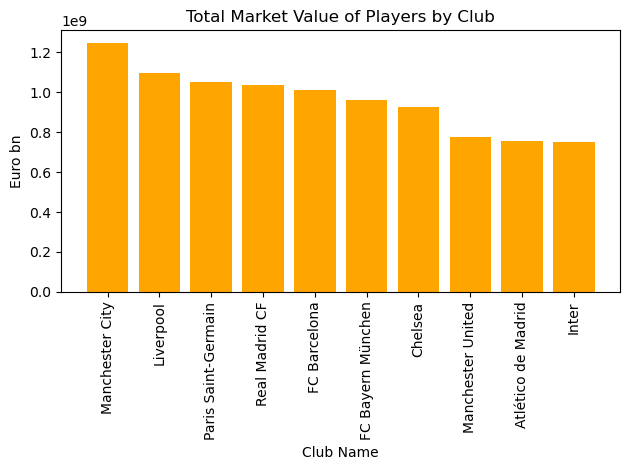

In [83]:
#CLub value based on total player roster histogram

clubs = club_top10_value.index
values = club_top10_value.values

plt.bar(clubs, values, color='orange')
plt.xlabel('Club Name')
plt.ylabel('Euro bn')
plt.title('Total Market Value of Players by Club')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

In [84]:
# Average wadge of Bayern players
bayern_players = football_df[football_df['Club Name'] == 'FC Bayern München']

# Calculate the average wage of Bayern players
average_wage_bayern = bayern_players['Wage(in Euro)'].mean()

print("Average wage of Bayern players:", average_wage_bayern)

Average wage of Bayern players: 68681.81818181818


In [85]:
# Median value of Bayern players
bayern_players = football_df[football_df['Club Name'] == 'FC Bayern München']

median_value_bayern = bayern_players['Value(in Euro)'].median()
median_value_bayern

43250000.0

CORRELATION MATRIX

In [86]:
# Selecting the specific columns for correlation
selected_columns = football_df[['Overall', 'Potential', 'Value(in Euro)', 'Age','Wage(in Euro)']]

# Calculating the correlation matrix
correlation_matrix = selected_columns.corr()
display(correlation_matrix)

,Overall,Potential,Value(in Euro),Age,Wage(in Euro)
Overall,1.000000,0.660630,0.561642,0.442369,0.599129
Potential,0.660630,1.000000,0.532835,-0.263686,0.497392
Value(in Euro),0.561642,0.532835,1.000000,0.030662,0.822262
Age,0.442369,-0.263686,0.030662,1.000000,0.144251
Wage(in Euro),0.599129,0.497392,0.822262,0.144251,1.000000


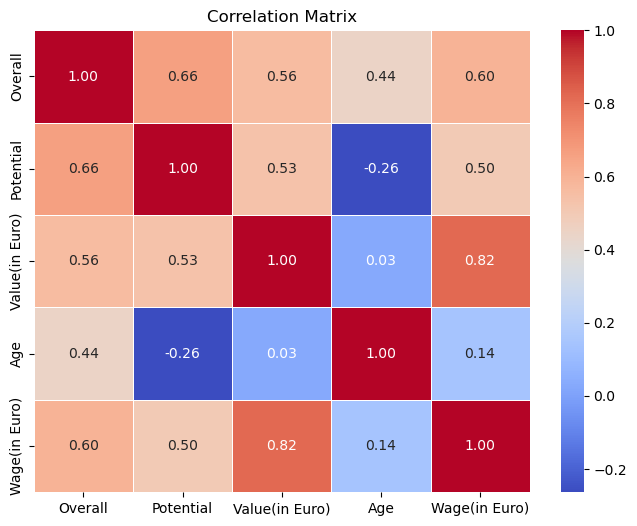

In [87]:
# Plotting the correlation matrix with the most relevant variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# The Models

In [93]:

X = football_df[['Overall', 'Age']]  
y = football_df['Value(in Euro)']

model = LinearRegression()

result = model.fit(X, y)

result.score(X, y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

0.37441572832292425

In [98]:
# Lets try to standardise the data:

X = football_df[['Overall','Age']]  
y = football_df['Value(in Euro)']  

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a pipeline that includes scaling and linear regression
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse , r2)
# a bit better but not by much and our mse is too high

# I'm going to try to standardise manually without using the sklean standardscaler:

# Prepare data
X = football_df[['Overall', 'Age']]
y = football_df['Value(in Euro)']

X_standardized = (X - X.mean()) / X.std()

# Create and fit the linear regression model
model = LinearRegression()
result = model.fit(X_standardized, y)

# Evaluate the model
score = result.score(X_standardized, y)

print(score)
# This is somehow worse.

29966938314470.2 0.40839927528048814
0.37441572832292425


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

 # PolyModel

In [100]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

features = ['Overall', 'Age']  
X = football_df[features]  
y = football_df['Value(in Euro)']  



# Polynomial regression pipeline
degree = 2  # Degree of polynomial features -  2 means exponential basically - defined here for testing purposes
poly_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    LinearRegression()
)

# Training the model
poly_model.fit(X, y)

#For a specific player
player = football_df[football_df['Known As'] == 'M. Neuer'][features] # you have to change player here manually

player_features = player.values.reshape(1, -1)
player_value_pred = poly_model.predict(player_features)
print("Predicted market value for player: €", player_value_pred[0])

# Now, to predict for a specific team:
team_name = "FC Bayern München" # change team name here to see prediction for the whole team, we can do the same for player but I wont be using it
team_data = football_df[football_df['Club Name'] == team_name]

if not team_data.empty:
    team_features = team_data[features]
    team_values_pred = poly_model.predict(team_features)
    
    team_data['Predicted Market Value'] = team_values_pred
    
    team_data_sorted = team_data.sort_values(by='Predicted Market Value', ascending=False)
    
    print(team_data_sorted[['Known As', 'Predicted Market Value']])
else:
    print("No data found for", {team_name}, "Please check the team name and try again.")

Predicted market value for player: € 40181656.54069907
             Known As  Predicted Market Value
17         J. Kimmich            5.511834e+07
84         M. de Ligt            4.898998e+07
15            S. Mané            4.855283e+07
141         A. Davies            4.697780e+07
41        L. Goretzka            4.671449e+07
56           K. Coman            4.477361e+07
67          S. Gnabry            4.090763e+07
7            M. Neuer            4.018166e+07
302        J. Musiala            3.925756e+07
91       L. Hernández            3.721101e+07
135           L. Sané            3.721101e+07
34          T. Müller            3.684823e+07
233       N. Mazraoui            3.376163e+07
317      D. Upamecano            3.208928e+07
526    R. Gravenberch            3.048668e+07
566         B. Pavard            2.126815e+07
441       M. Sabitzer            2.119350e+07
3228      J. Stanišić            9.597008e+06
1433       S. Ulreich            5.093276e+06
2931          B. Sarr    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

In [101]:
high_rated_players = football_df[football_df['Overall'] > 80]

high_rated_players_sorted = high_rated_players.sort_values(by='Value(in Euro)', ascending=True)

young_high_rated = high_rated_players_sorted[high_rated_players_sorted['Age'] < 30]

#high_rated_players_sorted.head(20)
display(young_high_rated.sort_values(by='Overall', ascending=True))

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Value/Rating
343,José Sá,José Pedro Malheiro de Sá,81,82,20000000,GK,GK,Portugal,https://cdn.sofifa.net/players/212/442/23_60.png,29,...,38,36,33,36,33,32,33,32,82,2.469136e+05
367,H. Lozano,Hirving Lozano,81,81,28000000,RW,RW,Mexico,https://cdn.sofifa.net/players/221/992/23_60.png,26,...,75,81,67,62,67,63,54,63,22,3.456790e+05
310,Nailton Padrenda,Nailton Padrenda Mendes,81,81,28000000,"CAM,CF,ST",CAM,Brazil,https://cdn.sofifa.net/players/230/384/23_60.png,26,...,80,81,69,70,69,67,62,67,18,3.456790e+05
315,G. Mancini,Gianluca Mancini,81,83,28000000,CB,CB,Italy,https://cdn.sofifa.net/players/229/582/23_60.png,26,...,63,60,73,76,73,76,83,76,19,3.456790e+05
303,S. Obisanya,Sam Obisanya,81,88,52500000,"RM,RB",RM,Nigeria,https://cdn.sofifa.net/players/269/765/23_60.png,22,...,80,82,80,77,80,78,74,78,22,6.481481e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,H. Kane,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,...,84,86,69,71,69,66,64,66,23,1.185393e+06
12,H. Son,Heung Min Son,89,89,101000000,"LW,LM",LW,Korea Republic,https://cdn.sofifa.net/players/200/104/23_60.png,29,...,83,89,71,67,71,67,57,67,22,1.134831e+06
14,J. Oblak,Jan Oblak,89,91,85500000,GK,GK,Slovenia,https://cdn.sofifa.net/players/200/389/23_60.png,29,...,41,37,35,40,35,35,36,35,90,9.606742e+05
17,J. Kimmich,Joshua Kimmich,89,90,105500000,"CDM,RB",CDM,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,...,89,86,87,89,87,86,84,86,24,1.185393e+06


PLAYERS TO SELL

In [53]:
# Filter the dataset to include only Bayern players who are more than 30 years old
bayern_players_over_30 = football_df[(football_df['Club Name'] == 'FC Bayern München') & (football_df['Age'] > 30)]

# Calculate the average wage of these players
average_wage_bayern_over_30 = bayern_players_over_30['Wage(in Euro)'].mean()

print("Average wage of Bayern players who are more than 30 years old:", average_wage_bayern_over_30)


Average wage of Bayern players who are more than 30 years old: 73666.66666666667


In [54]:
# Filter the dataset to include only Bayern players who are under 30 years old
bayern_players_under_30 = football_df[(football_df['Club Name'] == 'FC Bayern München') & (football_df['Age'] < 30)]

# Calculate the average wage of these players
average_wage_bayern_under_30 = bayern_players_under_30['Wage(in Euro)'].mean()

print("Average wage of Bayern players who are under 30 years old:", average_wage_bayern_under_30)

Average wage of Bayern players who are under 30 years old: 65235.294117647056


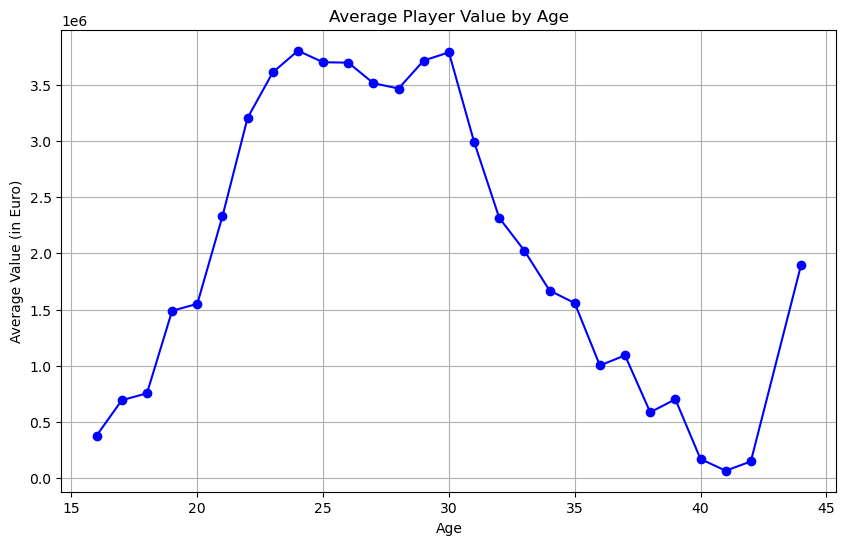

In [55]:
average_value_by_age = football_df.groupby('Age')['Value(in Euro)'].mean().reset_index()

# Plot the average player value by age
plt.figure(figsize=(10, 6))
plt.plot(average_value_by_age['Age'], average_value_by_age['Value(in Euro)'], marker='o', color='b')
plt.title('Average Player Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Value (in Euro)')
plt.grid(True)
plt.show()

In [56]:
# Players >30
bayern_players_over_30 = football_df[(football_df['Club Name'] == 'FC Bayern München') & (football_df['Age'] > 30)]

display(bayern_players_over_30)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Value/Rating
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,53,47,39,46,39,38,37,38,90,150000.000000
34,T. Müller,Thomas Müller,87,87,63000000,"CAM,CF",CAM,Germany,https://cdn.sofifa.net/players/189/596/23_60.png,32,...,85,86,74,74,74,72,66,72,23,724137.931034
1433,S. Ulreich,Sven Ulreich,75,75,1800000,GK,GK,Germany,https://cdn.sofifa.net/players/186/569/23_60.png,33,...,32,30,28,31,28,28,29,28,75,24000.000000


NEW PLAYERS TO REPLACE NEUER

In [57]:
# Filter the dataset to include only goalkeepers who are not part of Bayern Munich and are under 30 years old
young_goalkeepers = football_df[(football_df['Positions Played'].str.contains('GK')) & 
                                (football_df['Club Name'] != 'FC Bayern München') & 
                                (football_df['Age'] <= 28)]

# Sort the young goalkeepers by Overall rating in descending order
sorted_young_goalkeepers = young_goalkeepers.sort_values(by='Overall', ascending=False)

# Select the top 3 goalkeepers among young goalkeepers as potential replacements
top_two_young_goalkeepers = sorted_young_goalkeepers.head(13)

# Print information about the top 3 goalkeepers
print("Recommended young goalkeepers to replace Manuel Neuer:")
for index, goalkeeper in top_two_young_goalkeepers.iterrows():
    print("Name:", goalkeeper['Full Name'])
    print("Age:", goalkeeper['Age'])
    print("Potential:", goalkeeper['Potential'])
    print("Contract Until:", goalkeeper['Contract Until'])
    print("Overall Rating:", goalkeeper['Overall'])
    print("Value (in Euro):", goalkeeper['Value(in Euro)'])
    print("Current Wage(in Euro):", goalkeeper["Wage(in Euro)"])

Recommended young goalkeepers to replace Manuel Neuer:
Name: Ederson Santana de Moraes
Age: 28
Potential: 91
Contract Until: 2026
Overall Rating: 89
Value (in Euro): 88000000
Current Wage(in Euro): 210000
Name: Gianluigi Donnarumma
Age: 23
Potential: 92
Contract Until: 2026
Overall Rating: 88
Value (in Euro): 103500000
Current Wage(in Euro): 110000
Name: Mike Maignan
Age: 26
Potential: 90
Contract Until: 2026
Overall Rating: 87
Value (in Euro): 80000000
Current Wage(in Euro): 90000
Name: Unai Simón Mendibil
Age: 25
Potential: 86
Contract Until: 2025
Overall Rating: 83
Value (in Euro): 37000000
Current Wage(in Euro): 30000
Name: Gregor Kobel
Age: 24
Potential: 88
Contract Until: 2026
Overall Rating: 83
Value (in Euro): 44000000
Current Wage(in Euro): 40000
Name: André Onana
Age: 26
Potential: 85
Contract Until: 2027
Overall Rating: 82
Value (in Euro): 30500000
Current Wage(in Euro): 59000
Name: Alejandro Remiro Gargallo
Age: 27
Potential: 84
Contract Until: 2027
Overall Rating: 82
Value

In [58]:
X = football_df[['Overall', 'Potential', 'Age']]
y = football_df['Wage(in Euro)']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X, y)

# Prediction wage for each player
new_player_features = [[80, 85, 23]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for Alban Lafont:", predicted_wage)
new_player_features = [[82, 87, 24]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for Gianluigi Donnarumma:", predicted_wage)
new_player_features = [[87, 81, 26]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for Mike Maignan:", predicted_wage)

Predicted wage for Alban Lafont: [37040.80149453]
Predicted wage for Gianluigi Donnarumma: [40600.34575226]
Predicted wage for Mike Maignan: [46175.03824158]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

NEW PLAYERS TO BUY TO REPLACE MULLER

In [59]:
young_cam = football_df[(football_df['Positions Played'].str.contains('CAM,CF')) & 
                                (football_df['Club Name'] != 'FC Bayern München') & 
                                (football_df['Age'] <= 28)]


sorted_young_cam = young_cam.sort_values(by='Overall', ascending=False)

# Select the top 3 cam among young cam as potential replacements
top_two_young_cam = sorted_young_cam.head(3)

# Print information about the top 3 cam
print("Recommended young goalkeepers to replace Thomas Muller:")
for index, cam in top_two_young_cam.iterrows():
    print("Name:", cam['Full Name'])
    print("Age:", cam['Age'])
    print("Potential:", cam['Potential'])
    print("Contract Until:", cam['Contract Until'])
    print("Overall Rating:", cam['Overall'])
    print("Value (in Euro):", cam['Value(in Euro)'])
    print("Current Wage(in Euro):", cam["Wage(in Euro)"])

Recommended young goalkeepers to replace Thomas Muller:
Name: Kai Havertz
Age: 23
Potential: 91
Contract Until: 2025
Overall Rating: 84
Value (in Euro): 84500000
Current Wage(in Euro): 130000
Name: Daniel Olmo Carvajal
Age: 24
Potential: 87
Contract Until: 2024
Overall Rating: 82
Value (in Euro): 46000000
Current Wage(in Euro): 59000
Name: Nailton Padrenda Mendes
Age: 26
Potential: 81
Contract Until: 2025
Overall Rating: 81
Value (in Euro): 28000000
Current Wage(in Euro): 47000


In [60]:
X = football_df[['Overall', 'Potential', 'Age']]
y = football_df['Wage(in Euro)']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X, y)

# Prediction wage for each player
new_player_features = [[84, 91, 23]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for Kai Havertz:", predicted_wage)
new_player_features = [[82, 87, 24]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for Daniel Olmo Carvajal:", predicted_wage)
new_player_features = [[81, 81, 26]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for Nailton Padrenda Mendes:", predicted_wage)

Predicted wage for Kai Havertz: [45457.5624459]
Predicted wage for Daniel Olmo Carvajal: [40600.34575226]
Predicted wage for Nailton Padrenda Mendes: [36405.31215154]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

NEW PLAYERS TO BUY TO REPLACE ULREICH

In [61]:
# Filter the dataset to include only goalkeepers who are not part of Bayern Munich and are under 28 years old
young_goalkeepers = football_df[(football_df['Positions Played'].str.contains('GK')) & 
                                (football_df['Club Name'] != 'FC Bayern München') & 
                                (football_df['Age'] <= 28)]

# Sort the young goalkeepers by Overall rating in descending order
sorted_young_goalkeepers = young_goalkeepers.sort_values(by='Overall', ascending=False)

# Select the top 3 goalkeepers among young goalkeepers as potential replacements
top_two_young_goalkeepers = sorted_young_goalkeepers.head(3)

# Print information about the top 3 goalkeepers
print("Recommended young goalkeepers to replace Manuel Neuer:")
for index, goalkeeper in top_two_young_goalkeepers.iterrows():
    print("Name:", goalkeeper['Full Name'])
    print("Age:", goalkeeper['Age'])
    print("Potential:", cam['Potential'])
    print("Contract Until:", cam['Contract Until'])
    print("Overall Rating:", goalkeeper['Overall'])
    print("Value (in Euro):", goalkeeper['Value(in Euro)'])
    print("Current Wage(in Euro):", cam["Wage(in Euro)"])

Recommended young goalkeepers to replace Manuel Neuer:
Name: Ederson Santana de Moraes
Age: 28
Potential: 81
Contract Until: 2025
Overall Rating: 89
Value (in Euro): 88000000
Current Wage(in Euro): 47000
Name: Gianluigi Donnarumma
Age: 23
Potential: 81
Contract Until: 2025
Overall Rating: 88
Value (in Euro): 103500000
Current Wage(in Euro): 47000
Name: Mike Maignan
Age: 26
Potential: 81
Contract Until: 2025
Overall Rating: 87
Value (in Euro): 80000000
Current Wage(in Euro): 47000


In [62]:
X = football_df[['Overall', 'Potential', 'Age']]
y = football_df['Wage(in Euro)']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X, y)

# Prediction wage for each player
new_player_features = [[89, 81, 28]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for the new player 1:", predicted_wage)
new_player_features = [[88, 81, 23]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for the new player 2:", predicted_wage)
new_player_features = [[87, 81, 26]] 
predicted_wage = model.predict(new_player_features)
print("Predicted wage for the new player 3:", predicted_wage)

Predicted wage for the new player 1: [48768.47791057]
Predicted wage for the new player 2: [48798.02946481]
Predicted wage for the new player 3: [46175.03824158]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

In [63]:
# Average wage of Bayern players
bayern_players_avg_wage = football_df[football_df['Club Name'] == 'FC Bayern München']

bayern_players_avg_wage = bayern_players['Value(in Euro)'].mean()
bayern_players_avg_wage

43744318.18181818

In [64]:
manuel_neuer_entry = football_df[football_df['Full Name'] == 'Manuel Neuer']

# Check if Manuel Neuer's entry exists
if not manuel_neuer_entry.empty:
    # Retrieve the wage value for Manuel Neuer
    manuel_neuer_wage = manuel_neuer_entry['Wage(in Euro)'].values[0]
    print("Manuel Neuer's wage:", manuel_neuer_wage)
else:
    print("Manuel Neuer not found in the dataset.")

Manuel Neuer's wage: 72000


In [65]:
mueller_entry = football_df[football_df['Full Name'] == 'Thomas Müller']

# Check if Manuel Neuer's entry exists
if not mueller_entry.empty:
    # Retrieve the wage value for Manuel Neuer
    mueller_wage = mueller_entry['Wage(in Euro)'].values[0]
    print("Thomas Müller's wage:", mueller_wage)
else:
    print("Thomas Müller not found in the dataset.")

Thomas Müller's wage: 115000
